<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Neural Network Framework (Keras)

## *Data Science Unit 4 Sprint 2 Assignmnet 3*

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
# imports and loads boston housing dataset with train and test split
from keras.datasets import boston_housing
(x_train1, y_train1), (x_test1, y_test1) = boston_housing.load_data()

Using TensorFlow backend.


In [3]:
# use keras utility to normalize
# how to normalize them with the same scale??
x_train1n = keras.utils.normalize(x_train1)
x_test1n = keras.utils.normalize(x_test1)

In [4]:
# checks the number of features to know the number of input connections
len(x_train1[0])

13

In [5]:
# resets the value of mods incase cell is rerun to avoid issues
mod = []

# sets model equal to an instance of the sequential model
mod = Sequential()

# adds first input layer that takes 13 inputs and outputs to 3 hidden nodes
mod.add(Dense(8, input_shape=(13,), activation='relu'))

# adds second hidden layer
mod.add(Dense(4, activation='relu'))

# adds an output layer
mod.add(Dense(1))

# compile model
mod.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

In [6]:
# looks at summary
mod.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 112       
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 153
Trainable params: 153
Non-trainable params: 0
_________________________________________________________________


In [7]:
# fits model to data
history = mod.fit(x_train1, y_train1, epochs=100, verbose=False)

# evaluates model with test data
eval_mse = mod.evaluate(x_test1, y_test1, verbose=False)
print(f'MSE was {eval_mse[1]}')

MSE was 65.04319763183594


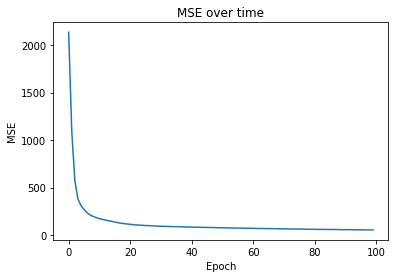

In [8]:
# Plot training & validation accuracy values over time
plt.plot(history.history['mse'])
plt.title('MSE over time')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.show()

In [9]:
# quick linear regression to get accuracy
LR = LinearRegression()
LR.fit(x_train1n, y_train1)
preds = LR.predict(x_test1n)

mse_LR = mean_squared_error(y_test1, preds)
print(f'MSE for linear reg model was {mse_LR}')

MSE for linear reg model was 18.16551049349648


## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- Make sure to have your final layer have as many nodes as the number of classes that you want to predict.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

In [10]:
from keras.datasets import fashion_mnist
(x_train2, y_train2), (x_test2, y_test2) = fashion_mnist.load_data()

In [11]:
# reformats  observations to be one dimentional
x_train2 = x_train2.reshape(60000, 784)
x_test2 = x_test2.reshape(10000, 784)

In [12]:
# converts values to float
x_train2 = x_train2.astype('float32')
x_test2 = x_test2.astype('float32')

In [13]:
# checks how many categories there are
len(np.unique(y_train2))

10

In [14]:
# one hot encodes the labels
y_train2_OHE = keras.utils.to_categorical(y_train2, 10)
y_test2_OHE = keras.utils.to_categorical(y_test2, 10)

# checks new format
y_train2_OHE

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [15]:
# resets the value of mod2 incase cell is rerun to avoid issues
mod2 = []

# creates sequential model
mod2 = Sequential()

# adds first input layer that takes 784 inputs and outputs to 8 hidden nodes
mod2.add(Dense(8, input_shape=(784,), activation='sigmoid'))

# second hidden layer
mod2.add(Dense(4, activation='relu')) 

# output layer
mod2.add(Dense(10, activation='softmax'))

# compile mod2
mod2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#returns summary
mod2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 8)                 6280      
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_5 (Dense)              (None, 10)                50        
Total params: 6,366
Trainable params: 6,366
Non-trainable params: 0
_________________________________________________________________


In [18]:
# fits model to data
history2 = mod2.fit(x_train2, y_train2_OHE, epochs=100, verbose=False)

# evaluates model with test data
evals2 = mod2.evaluate(x_test2, y_test2_OHE, verbose=False)
print(f'Model accuracy was {evals2[1]}')

Model accuracy was 0.652899980545044


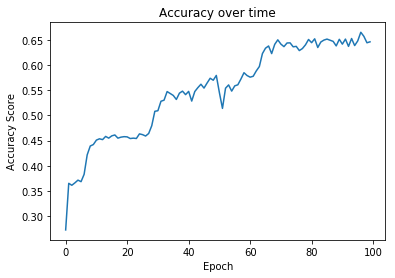

In [17]:
# Plot training & validation accuracy values over time
plt.plot(history2.history['accuracy'])
plt.title('Accuracy over time')
plt.ylabel('Accuracy Score')
plt.xlabel('Epoch')
plt.show()

## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.